<a href="https://colab.research.google.com/github/BrentanRath/Analyzing-HIV-With-Linear-Regression-and-Machine-Learning/blob/main/AP_Caluclus_A_B_Quarter_1_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AP Caluclus A/B Quarter 1 Project
*By Brentan R. Rath, Junior at Commonwealth Academy*


---

When I heard from my teacher that I could so research on a deisese, and work on using data to predict it, I was thrilled. So I took this chance to pratice my Data Science and Machine Learning skills.

I chose HIV for my project as it might have a large impact on my life, and hurts may people, even a few that I know and would call a friend. As well as it does have a lot of data for it.

Sadly, missing a lot of needed data, my Nueral Network was not able to actually make the predictions with the accuracy I wanted.



---


Importing Packages Required for Project


---



In [ ]:
import pandas as pd # Pandas (https://pandas.pydata.org/)
import numpy as np # NumPy (https://numpy.org/)
import matplotlib.pyplot as plt # Matplotlib( https://matplotlib.org/)
import ipywidgets as widgets # Ipywidgets (https://ipywidgets.readthedocs.io/en/stable/)
from IPython.display import display # IPPython (https://ipython.org/)
from google.colab import drive, output, userdata # Google Colab (https://colab.research.google.com/)
from tensorflow.keras.models import Sequential # TensorFlow (https://www.tensorflow.org/)
from tensorflow.keras.layers import Dense # TensorFlow (https://www.tensorflow.org/)
from sklearn.preprocessing import MinMaxScaler # scikit-learn (https://scikit-learn.org/stable/)

# Get's the file name from the Google Drive, it is a Google Colab Secret so I can share this easily, and change it for everyone.
dataFileName = userdata.get('dataFileName')
googleDrivePath="/content/drive/My Drive/"

In [ ]:
try:
  drive.mount('/content/drive', force_remount=False)
  print("Successfully mounted drive (connect to Goole Drive).")
except:
  print("Failed to mount the drive (connect to Goole Drive).")
  raise Exception

Mounted at /content/drive
Successfully mounted drive (connect to Goole Drive).


In [ ]:
try:
  dataFrameData = pd.read_excel(f"{googleDrivePath}{dataFileName}")
  print("Successfully loaded the spreadsheet/data.")
except FileNotFoundError:
  print(f"Error: The file {dataFileName} was not found in your Google Drive.")
  raise FileNotFoundError

Successfully loaded the spreadsheet/data.


In [ ]:
try:
  globalDataFrame = dataFrameData[dataFrameData.iloc[:, 2] == 'Global']
  print("Successfully removed all rows but with (Global) in the second column.")
except:
  print("Failed to remove all rows but with (Global) in the second column.")
  raise Exception

try:
  totalPopulationAndDateDataFrame = globalDataFrame.iloc[:, [0, 50]]
  print("Successfully removed all data other then population and date.")
except:
  print("Failed to remove all data other then population and date.")
  raise Exception

try:
  reIndexedDataFrame = totalPopulationAndDateDataFrame.reset_index(drop=True)
  print("Succsessfully reset dataframe index.")
except:
  print("Failed to reset dataframe index.")
  raise Exception

try:
  reIndexedDataFrame.columns = ['Year', 'Population']
  print("Succsessfully changed column titles.")
except:
  print("Failed to change the column titles.")
  raise Exception

try:
  finalDataFrame = reIndexedDataFrame
  print("Succsessfully changed variable name for easier reading.")
except:
  print("Failed to change variable name for easier reading.")
  raise Exception

try:
  if not pd.api.types.is_numeric_dtype(finalDataFrame['Year']):
    finalDataFrame['Year'] = pd.to_numeric(finalDataFrame['Year'])
  print("Succsessfully changed year rows to numeric.")
except:
  print("Failed to change the year rows to numeric.")
  raise Exception

try:
  if not pd.api.types.is_numeric_dtype(finalDataFrame['Population']):
    finalDataFrame['Population'] = finalDataFrame['Population'].astype(str).str.replace(' m', '', regex=False).astype(float)
  print("Succsessfully changed population rows to float.")
except:
  print("Failed to change population rows to float.")
  raise Exception

Successfully removed all rows but with (Global) in the second column.
Successfully removed all data other then population and date.
Succsessfully reset dataframe index.
Succsessfully changed column titles.
Succsessfully changed variable name for easier reading.
Succsessfully changed year rows to numeric.
Succsessfully changed population rows to float.


In [ ]:
try:
  x = finalDataFrame['Year'].values
  print("Succsessfully set x values to years.")
except:
  print("Failed to set x values to years.")
  raise Exception

try:
  y = finalDataFrame['Population'].values
  print("Succsessfully set y values to population.")
except:
  print("Failed to set y values to population.")
  raise Exception

try:
  coefficients = np.polyfit(x, y, 3)
  print("Succsessfully set cofficients.")
except:
  print("Failed to set cofficients.")
  raise Exception

Succsessfully set x values to years.
Succsessfully set y values to population.
Succsessfully set cofficients.


In [ ]:
try:
  polynomial_function = np.poly1d(coefficients)
  print("Succsessfully created polynomial function.")
except:
  print("Failed to create polynomial function.")
  raise Exception

try:
  x_curve = np.linspace(finalDataFrame['Year'].min(), finalDataFrame['Year'].max(), 100)
  print("Succsessfully created the x curve on the polynomial function.")
except:
  print("Failed to create the x curve on the polynomial function.")
  raise Exception

try:
  y_curve = polynomial_function(x_curve)
  print("Succsessfully created the y curve on the polynomial function.")
except:
  print("Failed to create the y curve on the polynomial function.")
  raise Exception

Succsessfully created polynomial function.
Succsessfully created the x curve on the polynomial function.
Succsessfully created the y curve on the polynomial function.


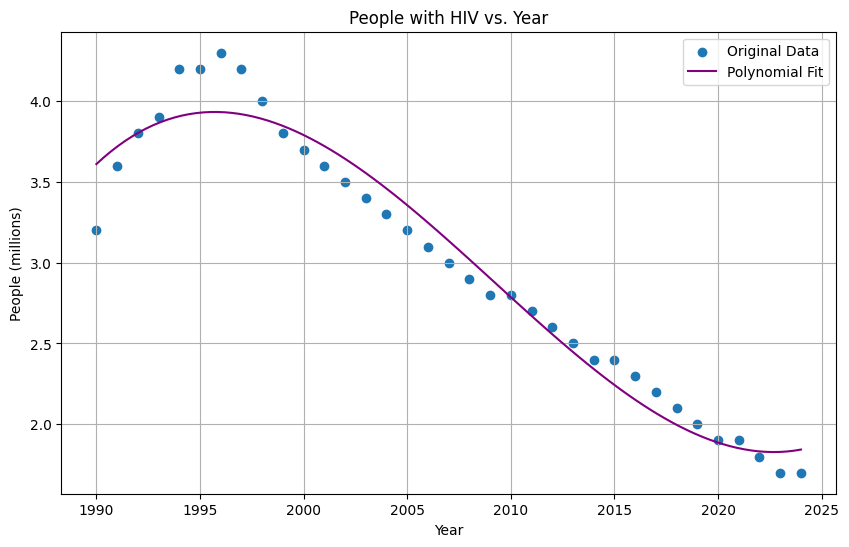

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(finalDataFrame['Year'], finalDataFrame['Population'], label='Original Data')
plt.plot(x_curve, y_curve, color='purple', label='Polynomial Fit')
plt.xlabel('Year')
plt.ylabel('People (millions)')
plt.title('People with HIV vs. Year')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def plot_with_prediction(year):
    try:
        predicted_population = polynomial_function(year)
        print(f"Successfully calculated predicted population for {year}.")
    except:
        print(f"Failed to calculate predicted population for {year}.")
        raise Exception

    try:
        plt.figure(figsize=(10, 6))
        plt.scatter(finalDataFrame['Year'], finalDataFrame['Population'], label='Original Data')
        plt.plot(x_curve, y_curve, color='purple', label='Polynomial Fit')

        plt.scatter(year, predicted_population, color='red', label=f'Prediction for {year}', marker='X', s=100)

        plt.xlabel('Year')
        plt.ylabel('People (millions)')
        plt.title(f'People with HIV vs. Year with {year} Prediction')
        plt.legend()
        plt.grid(True)
        plt.show()
        print("Successfully plotted the data with prediction.")
    except:
        print("Failed to plot the data with prediction.")
        raise Exception

    print(f"Predicted population for {year}: {predicted_population:.2f} million")

try:
    year_input = widgets.IntText(
        value=2030,
        description='Year:',
        disabled=False
    )
    print("Successfully created year input widget.")
except:
    print("Failed to create year input widget.")
    raise Exception

try:
    predict_button = widgets.Button(
        description='Predict and Plot'
    )
    print("Successfully created predict button widget.")
except:
    print("Failed to create predict button widget.")
    raise Exception

try:
    output_area = widgets.Output()
    print("Successfully created output area widget.")
except:
    print("Failed to create output area widget.")
    raise Exception

def on_button_clicked(b):
    with output_area:
        output_area.clear_output()
        try:
            plot_with_prediction(year_input.value)
            print("Successfully executed prediction and plotting.")
        except:
            print("Failed to execute prediction and plotting.")

predict_button.on_click(on_button_clicked)

display(year_input, predict_button, output_area)

Successfully created year input widget.
Successfully created predict button widget.
Successfully created output area widget.


IntText(value=2030, description='Year:')

Button(description='Predict and Plot', style=ButtonStyle())

Output()

# TESTING NN SECTION

In [ ]:
try:
    scaler = MinMaxScaler()
    print("Successfully initialized MinMaxScaler.")
except:
    print("Failed to initialize MinMaxScaler.")
    raise Exception

try:
    scaled_years = scaler.fit_transform(finalDataFrame['Year'].values.reshape(-1, 1))
    print("Successfully scaled years data.")
except:
    print("Failed to scale years data.")
    raise Exception

try:
    scaled_population = scaler.fit_transform(finalDataFrame['Population'].values.reshape(-1, 1))
    print("Successfully scaled population data.")
except:
    print("Failed to scale population data.")
    raise Exception

Successfully initialized MinMaxScaler.
Successfully scaled years data.
Successfully scaled population data.


In [ ]:
try:
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_shape=(1,)))
    model.add(Dense(units=1))
    print("Successfully created neural network model.")
except:
    print("Failed to create neural network model.")
    raise Exception

try:
    model.compile(optimizer='adam', loss='mean_squared_error')
    print("Successfully compiled neural network model.")
except:
    print("Failed to compile neural network model.")
    raise Exception

try:
    model.summary()
    print("Successfully displayed model summary.")
except:
    print("Failed to display model summary.")
    raise Exception

Successfully created neural network model.
Successfully compiled neural network model.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

Successfully displayed model summary.


In [ ]:
try:
    history = model.fit(scaled_years, scaled_population, epochs=100, batch_size=32)
    print("Successfully trained neural network model.")
except:
    print("Failed to train neural network model.")
    raise Exception

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2638
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2549
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2520
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2549
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2435
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2405
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2391
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2386
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2303
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2310
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2264
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2217
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2181
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2213
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2141
Epoch 16/100
2/2 ━━

In [ ]:
try:
    scaled_predictions = model.predict(scaled_years)
    predictions = scaler.inverse_transform(scaled_predictions)
    print("Successfully made predictions on scaled years and inverse transformed.")
except:
    print("Failed to make predictions on scaled years and inverse transformed.")
    raise Exception

try:
    predicted_years = scaler.inverse_transform(scaled_years).flatten()
    print("Successfully inverse transformed scaled years and flattened.")
except:
    print("Failed to inverse transform scaled years and flatten.")
    raise Exception

try:
    year_input_scaled = scaler.transform(np.array([[year_input.value]]))
    print(f"Successfully scaled input year {year_input.value}.")
except:
    print(f"Failed to scale input year {year_input.value}.")
    raise Exception

try:
    scaled_predicted_future_population = model.predict(year_input_scaled)
    print(f"Successfully predicted scaled future population for {year_input.value}.")
except:
    print(f"Failed to predict scaled future population for {year_input.value}.")
    raise Exception

try:
    predicted_future_population = scaler.inverse_transform(scaled_predicted_future_population)[0][0]
    print(f"Successfully inverse transformed predicted future population for {year_input.value}.")
except:
    print(f"Failed to inverse transformed predicted future population for {year_input.value}.")
    raise Exception

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Successfully made predictions on scaled years and inverse transformed.
Successfully inverse transformed scaled years and flattened.
Successfully scaled input year 2030.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Successfully predicted scaled future population for 2030.
Successfully inverse transformed predicted future population for 2030.


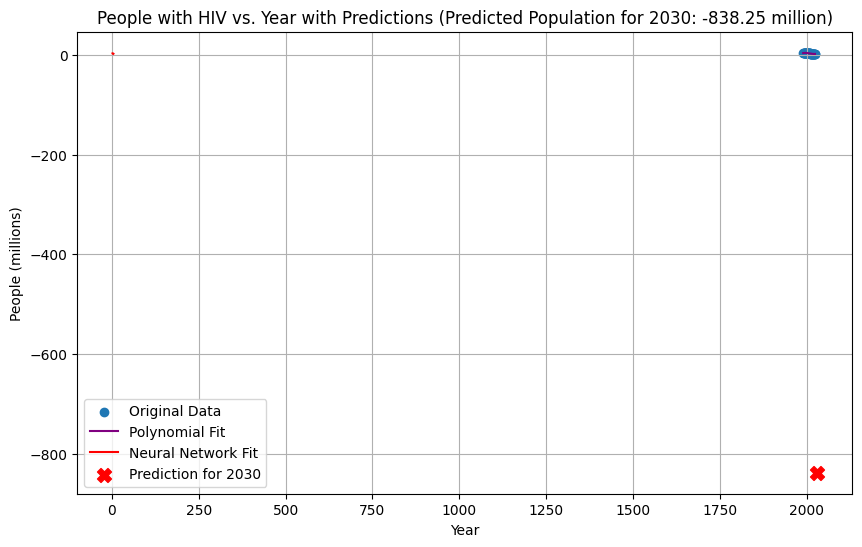

Successfully plotted data with both fits and prediction.


In [ ]:
try:
    plt.figure(figsize=(10, 6))
    plt.scatter(finalDataFrame['Year'], finalDataFrame['Population'], label='Original Data')
    plt.plot(x_curve, y_curve, color='purple', label='Polynomial Fit')
    plt.plot(predicted_years, predictions, color='red', label='Neural Network Fit')
    plt.scatter(year_input.value, predicted_future_population, color='red', label=f'Prediction for {year_input.value}', marker='X', s=100)
    plt.xlabel('Year')
    plt.ylabel('People (millions)')
    plt.title(f'People with HIV vs. Year with Predictions (Predicted Population for {year_input.value}: {predicted_future_population:.2f} million)')
    plt.legend()
    plt.grid(True)
    plt.show()
    print("Successfully plotted data with both fits and prediction.")
except:
    print("Failed to plot data with both fits and prediction.")
    raise Exception